In [130]:
import pandas as pd
import seaborn as sns
import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [131]:
data = pd.read_csv(r'propulsion.csv')

In [132]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [133]:
data.isnull().sum()

Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor decay state coefficient.           0
GT Turbine decay state coefficient.              0
dtype: int64

In [134]:
data.keys()

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [135]:
#model for predicting 'GT Compressor decay state coefficient.'
Y_c = data['GT Compressor decay state coefficient.']
Y_t = data['GT Turbine decay state coefficient.']
data.drop(['GT Compressor decay state coefficient.', 'GT Turbine decay state coefficient.'],axis=1,inplace=True)
X = data

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X = scaler.transform(X)
del data

size = 9000
X_train, X_test ,Y_c_train, Y_c_test, Y_t_train, Y_t_test = \
    X[:size] ,X[size:] ,Y_c[:size] ,Y_c[size:] ,Y_t[:size] , Y_t[size:]

In [136]:
model = Sequential()
model.add(Dense(300, input_shape= (16,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [137]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 300)               5100      
_________________________________________________________________
dense_32 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 45,401
Trainable params: 45,401
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)
history = model.fit(X_train, Y_c_train, epochs=200, validation_data=(X_test,Y_c_test), batch_size=1000,callbacks=[callback])

Epoch 1/200
9/9 [==============================] - 0s 31ms/step - loss: 0.1832 - val_loss: 0.0077
Epoch 2/200
9/9 [==============================] - 0s 21ms/step - loss: 0.0134 - val_loss: 0.0052
Epoch 3/200
9/9 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 4/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 5/200
9/9 [==============================] - 0s 14ms/step - loss: 9.6481e-04 - val_loss: 4.5490e-04
Epoch 6/200
9/9 [==============================] - 0s 17ms/step - loss: 5.6716e-04 - val_loss: 6.0957e-04
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 4.7727e-04 - val_loss: 3.8605e-04
Epoch 8/200
9/9 [==============================] - 0s 17ms/step - loss: 3.6998e-04 - val_loss: 3.6777e-04
Epoch 9/200
9/9 [==============================] - 0s 12ms/step - loss: 3.4663e-04 - val_loss: 3.1312e-04
Epoch 10/200
9/9 [==============================] - 0s 15ms/step - loss: 3.158

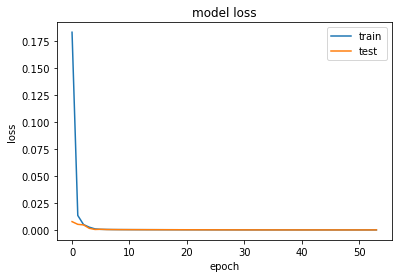

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('loss.png')
plt.show()

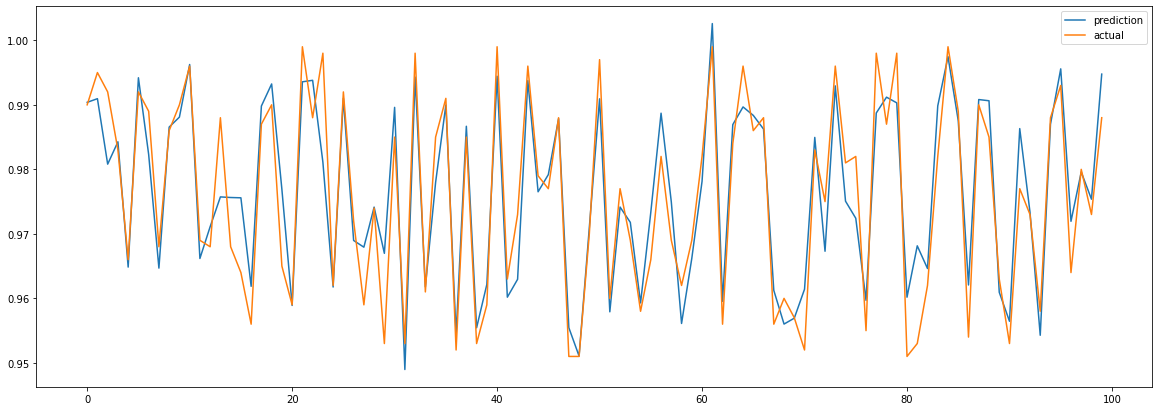

In [140]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,7))
plt.plot(range(100),y_pred.reshape(-1)[:100],label="prediction")
plt.plot(range(100),Y_c_test[:100],label='actual')
plt.legend()